### Perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# grab and process the raw data
path = open(r"C:\Users\vungu\Desktop\Python_TF\amazon_cells_labelled.txt")

In [3]:
amazon = pd.read_csv(path, delimiter='\t', header=None)

In [4]:
# 1 is positive and 0 is negative
amazon.head(30)

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [5]:
amazon.columns = ['0','1']

In [6]:
# identifying keywords
keywords = ['no', 'good', 'excellent', 'great', 'wasted', 'waste', 'impressed', 'odd', 'recommend', 'terrible', 'bad', 'misleading']

for key in keywords:
    # adding spaces around the key so that we are getting the word, not just the pattern matching
    amazon[str(key)] = amazon['0'].str.contains(' ' + str(key) + ' ', case=False)

In [7]:
# another feature option would be if the message is all uppercase because of either strong excitement or total disappointment 
amazon['allcaps'] = amazon['0'].str.isupper()

In [8]:
amazon.head()

,0,1,no,good,excellent,great,wasted,waste,impressed,odd,recommend,terrible,bad,misleading,allcaps
0,So there is no way for me to plug it in here i...,0,True,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,True,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# setting 1 (positive) as True and 0 (negative) as False
amazon['1'] = (amazon['1']== 1)

In [10]:
amazon.head()

,0,1,no,good,excellent,great,wasted,waste,impressed,odd,recommend,terrible,bad,misleading,allcaps
0,So there is no way for me to plug it in here i...,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,True,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False,False,False,False,False,False,False


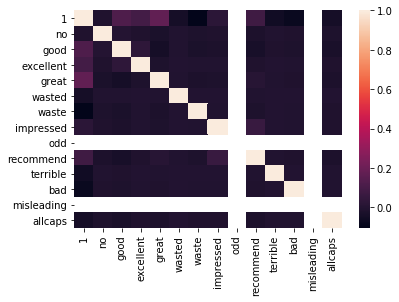

In [11]:
# checking to see how correlated the keywords to each other
sns.heatmap(amazon.corr())

Most of the words show strong independence from each other. The only exception is highly:recommend. For now, let's keep everything in the dataset.

In [12]:
# building training data
data = amazon[keywords + ['allcaps']]
target = amazon['1']

# our data is binary/boolean, so we are importing the Bernoulli classifier
from sklearn.naive_bayes import BernoulliNB

# instantiating our model and store it in a new variable
bnb = BernoulliNB()

# fitting model to the data
bnb.fit(data, target)

# classifying and storing the result in a new variable
y_pred = bnb.predict(data)

# displaying result
print('Number of mislabeled sentiments out of a total {} sentiments: {}'.format(data.shape[0], (target != y_pred).sum())) 

Number of mislabeled sentiments out of a total 1000 sentiments: 422
